Importar las librerias

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

Cargar las bases de datos

In [2]:
mdata = pd.read_csv("macrodata.csv")

In [3]:
mdata

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9/30/2008,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,12/31/2008,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,3/31/2009,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,6/30/2009,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


Seleccionar las variables

In [4]:
mata = mdata[['realgdp','realgovt','realdpi']]
#mdata.index = pd.DatetimeIndex(quarterly)
#mdata.head()

<Axes: >

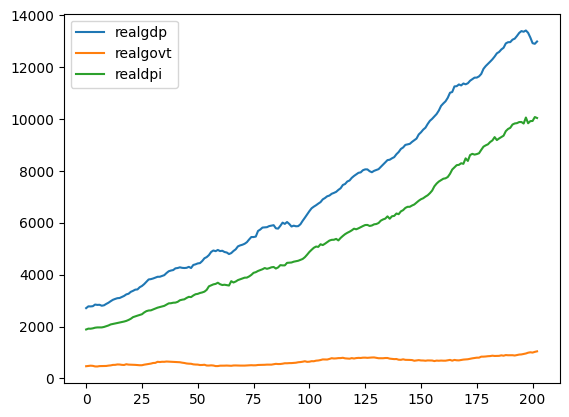

In [5]:
mata.plot()

Aplicar las pruebas de estacionalidad

In [ ]:
# Vamos a hacer un test de causalidad de Granger
# Vamos a estudiar el comovimiento o cointegración de las variables
# Hipotesis nula la segunda no es cusa de la primera

from statsmodels.tsa.stattools import grangercausalitytests

data = mdata[["realgdp", "realinv"]]
gc_res = grangercausalitytests(data, 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7877  , p=0.0966  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=2.8297  , p=0.0925  , df=1
likelihood ratio test: chi2=2.8101  , p=0.0937  , df=1
parameter F test:         F=2.7877  , p=0.0966  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2335  , p=0.7920  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=0.4789  , p=0.7871  , df=2
likelihood ratio test: chi2=0.4783  , p=0.7873  , df=2
parameter F test:         F=0.2335  , p=0.7920  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4273  , p=0.2361  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=4.4371  , p=0.2180  , df=3
likelihood ratio test: chi2=4.3886  , p=0.2224  , df=3
parameter F test:         F=1.4273  , p=0.2361  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1535  , p=0.3328  

In [ ]:
mata_difference = mata.diff()
mata_difference

,realgdp,realcons,realinv
0,NaN,NaN,NaN
1,68.452,26.3,23.961
2,-3.313,18.1,-21.633
3,9.716,1.9,10.130
4,62.495,16.8,32.366
...,...,...,...
198,-90.666,-83.3,-35.825
199,-182.680,-72.4,-133.032
200,-216.510,13.9,-299.167
201,-23.906,-20.2,-101.816


In [ ]:
from statsmodels.tsa.stattools import adfuller
prueba_estabilidad=adfuller(mata["realgdp"],autolag="AIC")
print("P-Value: ",prueba_estabilidad[1])

P-Value:  0.9982455372335032


In [ ]:
from statsmodels.tsa.stattools import adfuller
prueba_estabilidad=adfuller(mata["realinv"],autolag="AIC")
print("P-Value: ",prueba_estabilidad[1])

P-Value:  0.6484956579101143


In [ ]:
from statsmodels.tsa.stattools import adfuller
prueba_estabilidad=adfuller(mata_difference["realgdp"].dropna(),autolag="AIC")
print("P-Value: ",prueba_estabilidad[1])

P-Value:  3.327882187668224e-08


In [ ]:
from statsmodels.tsa.stattools import adfuller
prueba_estabilidad=adfuller(mata_difference["realinv"].dropna(),autolag="AIC")
print("P-Value: ",prueba_estabilidad[1])

P-Value:  4.297932808177072e-06


In [ ]:
data = mata_difference[["realgdp", "realinv"]].dropna()

In [ ]:
# Vamos a hacer un test de causalidad de Granger
# Vamos a estudiar el comovimiento o cointegración de las variables
# Hipotesis nula la segunda no es cusa de la primera

from statsmodels.tsa.stattools import grangercausalitytests

data = mata_difference[["realgdp", "realinv"]].dropna()
gc_res = grangercausalitytests(data, 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1842  , p=0.2778  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=1.2021  , p=0.2729  , df=1
likelihood ratio test: chi2=1.1985  , p=0.2736  , df=1
parameter F test:         F=1.1842  , p=0.2778  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0684  , p=0.1292  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=4.2429  , p=0.1199  , df=2
likelihood ratio test: chi2=4.1985  , p=0.1225  , df=2
parameter F test:         F=2.0684  , p=0.1292  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6174  , p=0.1867  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=5.0290  , p=0.1697  , df=3
likelihood ratio test: chi2=4.9665  , p=0.1743  , df=3
parameter F test:         F=1.6174  , p=0.1867  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5712  , p=0.1836  

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    model = VAR(data)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.647692899691098
BIC:  14.746299016349578

Order = 2
AIC:  14.63296239269235
BIC:  14.797878261019752

Order = 3
AIC:  14.552273291777729
BIC:  14.783963078441763

Order = 4
AIC:  14.573358469876112
BIC:  14.872291836302889

Order = 5
AIC:  14.558388547701254
BIC:  14.925040740758288

Order = 6
AIC:  14.532770652797762
BIC:  14.967622597389566

Order = 7
AIC:  14.554706914386808
BIC:  15.058245308012

Order = 8
AIC:  14.543865141546453
BIC:  15.11658255086683

Order = 9
AIC:  14.542278935776507
BIC:  15.184673895250008

Order = 10
AIC:  14.586108259005218
BIC:  15.298685371636296

Order = 11
AIC:  14.616966847623836
BIC:  15.400236887886376

Order = 12
AIC:  14.645094403109358
BIC:  15.49957442209896

Order = 13
AIC:  14.665522994600167
BIC:  15.59173642747435

Order = 14
AIC:  14.688589904522777
BIC:  15.687066680289464

Order = 15
AIC:  14.727035755864694
BIC:  15.798312409581188



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

In [ ]:
var = VAR(data)
x= var.select_order()
x.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,14.93,14.96,3.046e+06,14.94
1,14.73,14.83*,2.492e+06,14.77
2,14.71,14.89,2.456e+06,14.78
3,14.63,14.88,2.268e+06,14.73*
4,14.65,14.96,2.309e+06,14.78
5,14.63,15.01,2.262e+06,14.78
6,14.60,15.05,2.194e+06,14.78
7,14.62,15.14,2.236e+06,14.83
8,14.60,15.18,2.191e+06,14.84
9,14.59*,15.24,2.166e+06*,14.85


In [ ]:
results = var.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 08, Sep, 2023
Time:                     00:26:57
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.8723
Nobs:                     198.000    HQIC:                   14.6944
Log likelihood:          -1986.66    FPE:                2.13395e+06
AIC:                      14.5734    Det(Omega_mle):     1.95242e+06
--------------------------------------------------------------------
Results for equation realgdp
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             19.930789         8.656888            2.302           0.021
L1.realgdp         0.507715         0.108795            4.667           0.000
L1.realinv        -0.315655         0.151024           -2.090         

In [ ]:
results.irf(4)

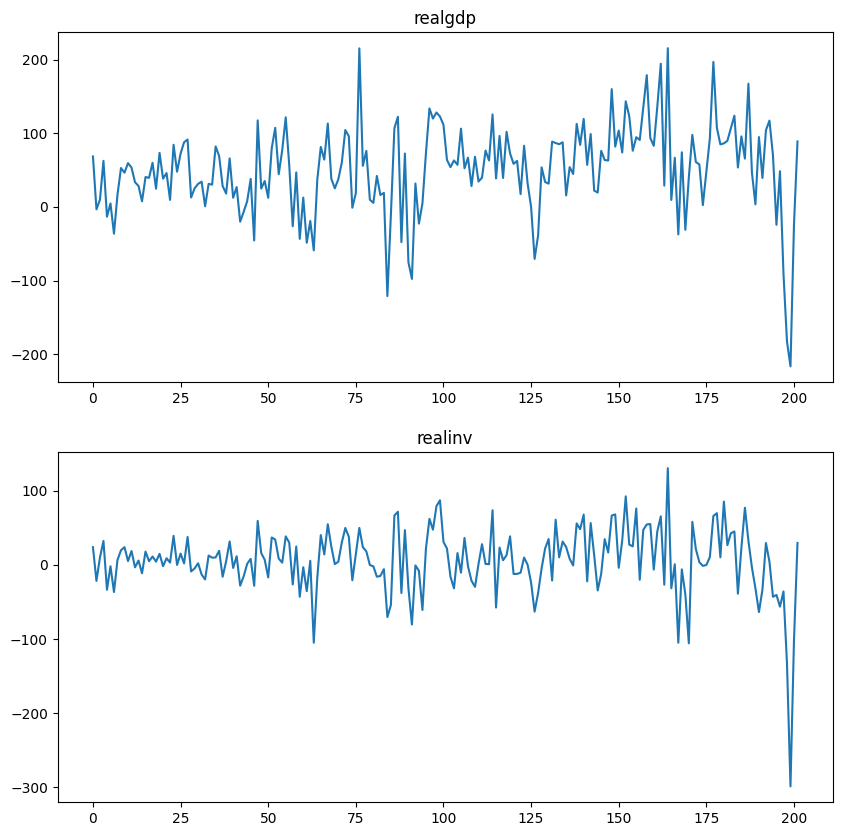

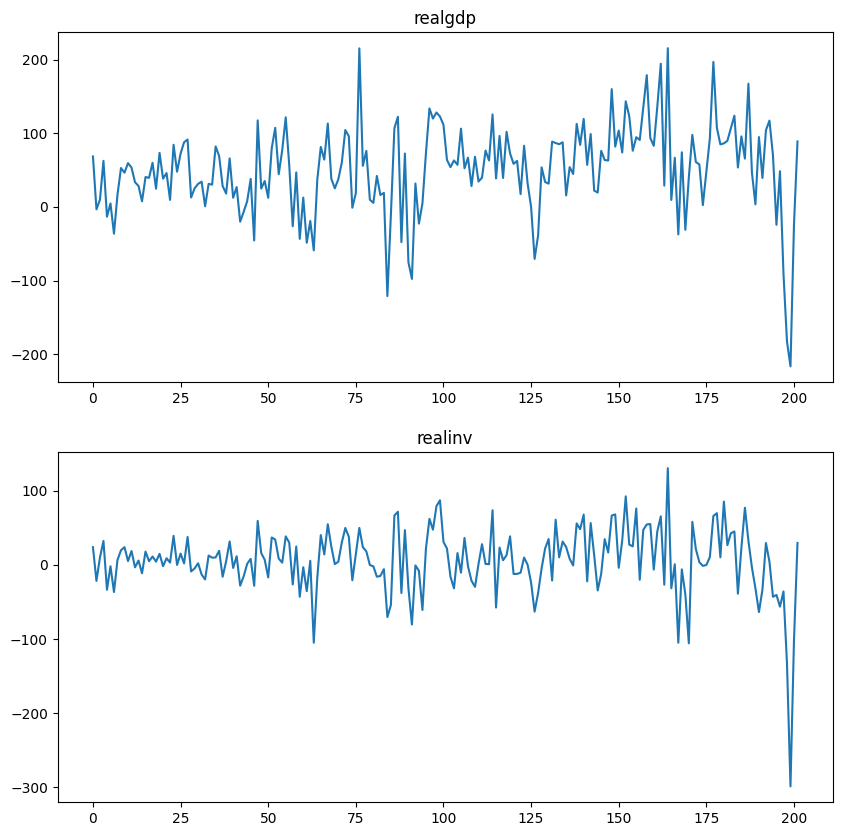

In [ ]:
results.plot()

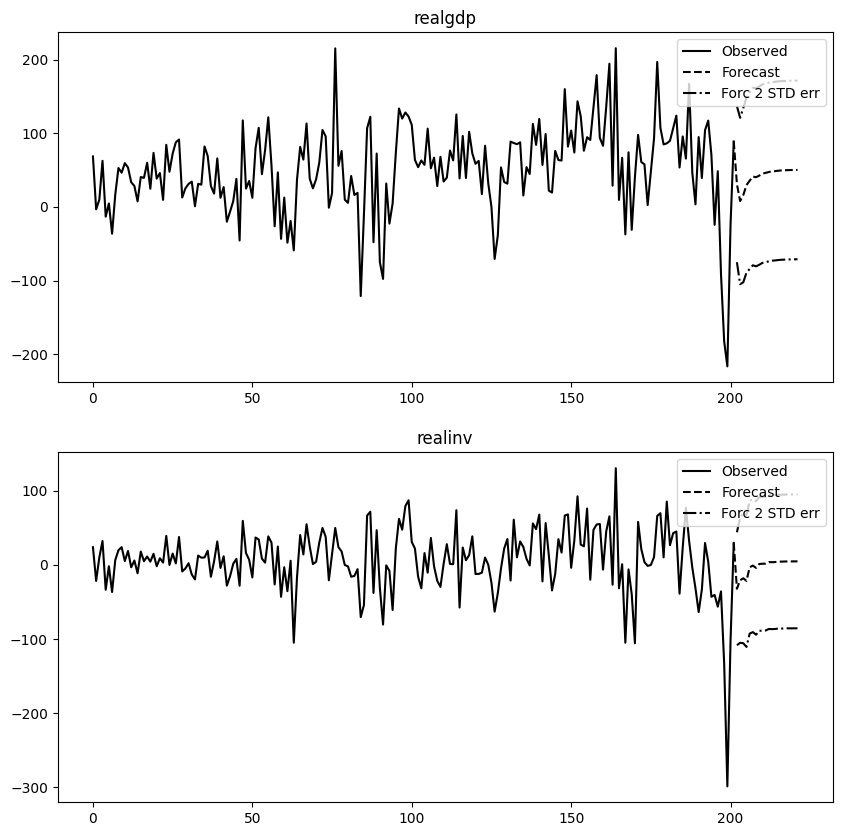

In [ ]:
results.plot_forecast(20);


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
# Hipotesis nula es que no hay cointegracion
# Hipotesis alterna es que si hay cointegracion
#

def cointegration_test(mata, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(mata[["realgdp", "realinv"]],-1,4)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(mata[["realgdp", "realinv"]].columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(mata)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
realgdp ::  37.89     > 12.3212   =>   True
realinv ::  4.55      > 4.1296    =>   True


In [ ]:
irf = results.irf(4)

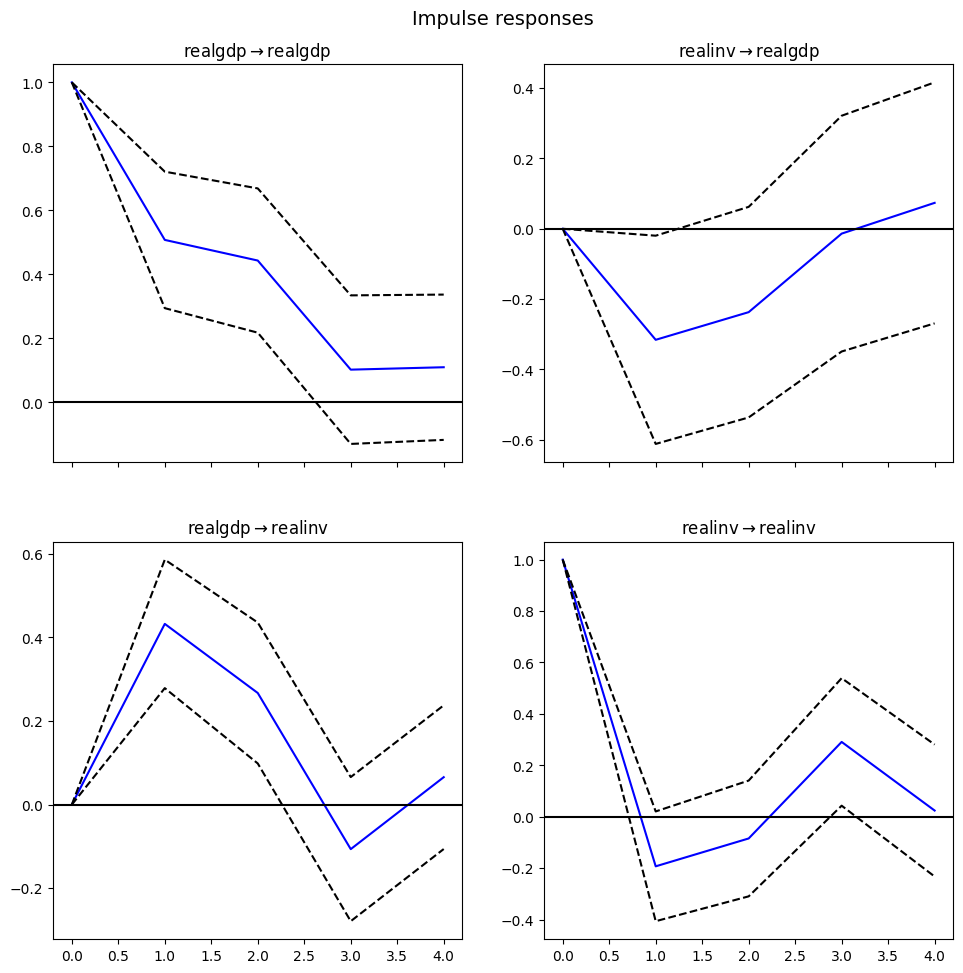

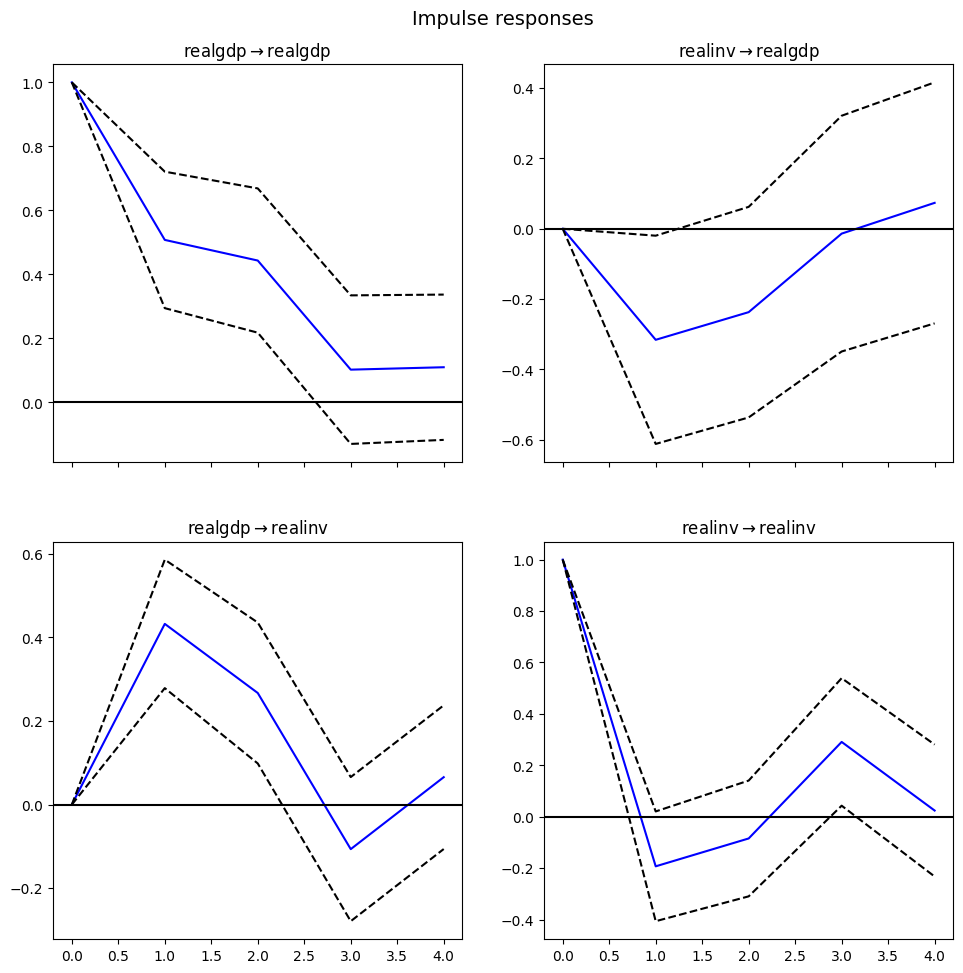

In [ ]:
irf.plot(orth=False)

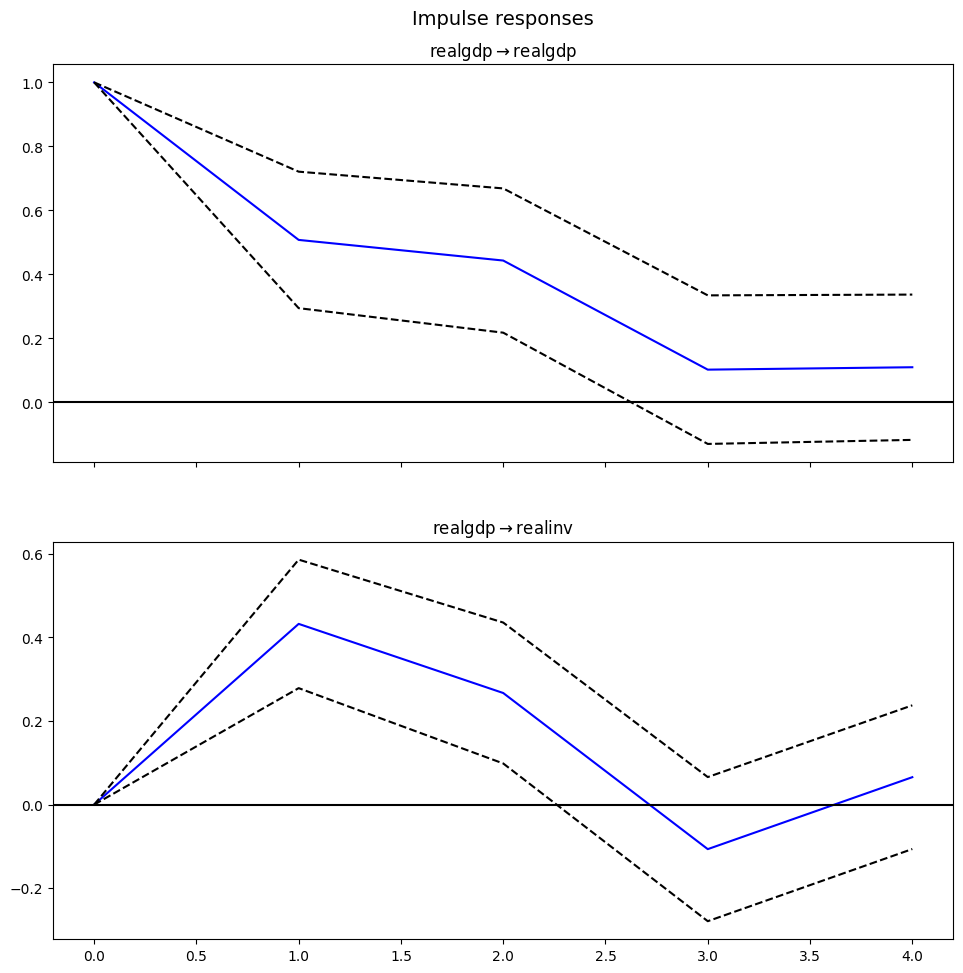

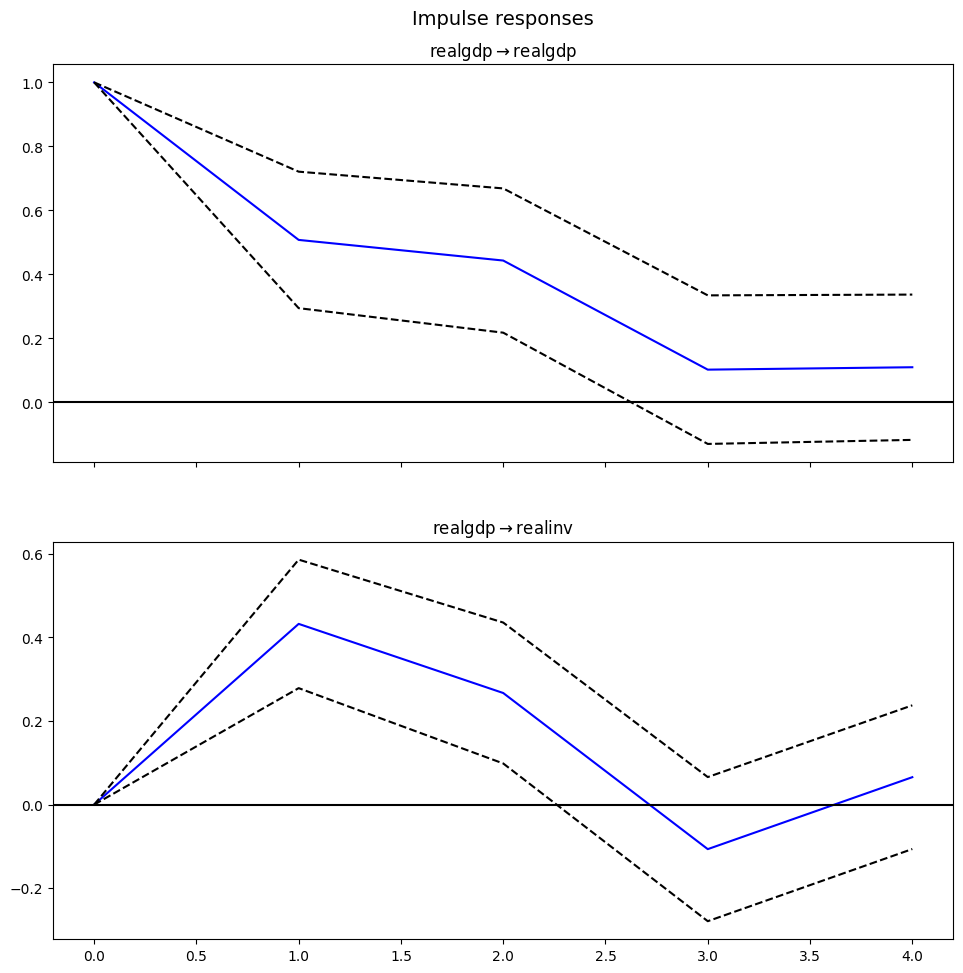

In [ ]:
irf.plot(impulse='realgdp')

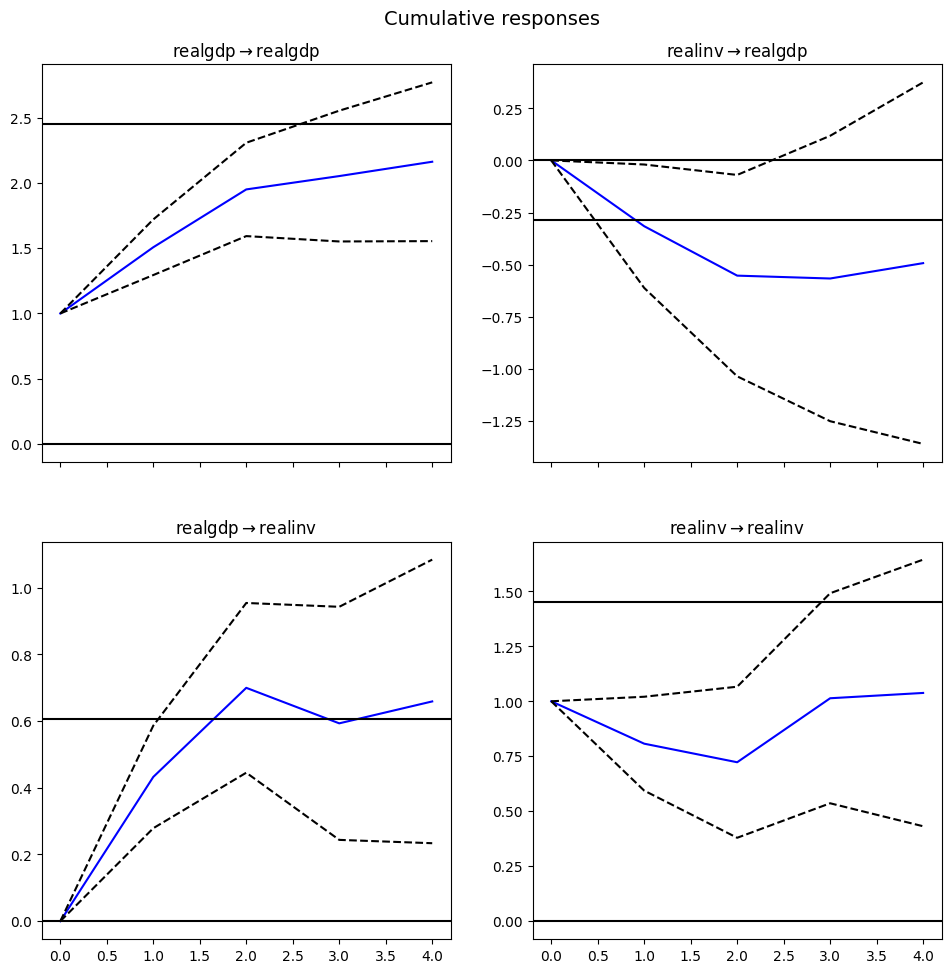

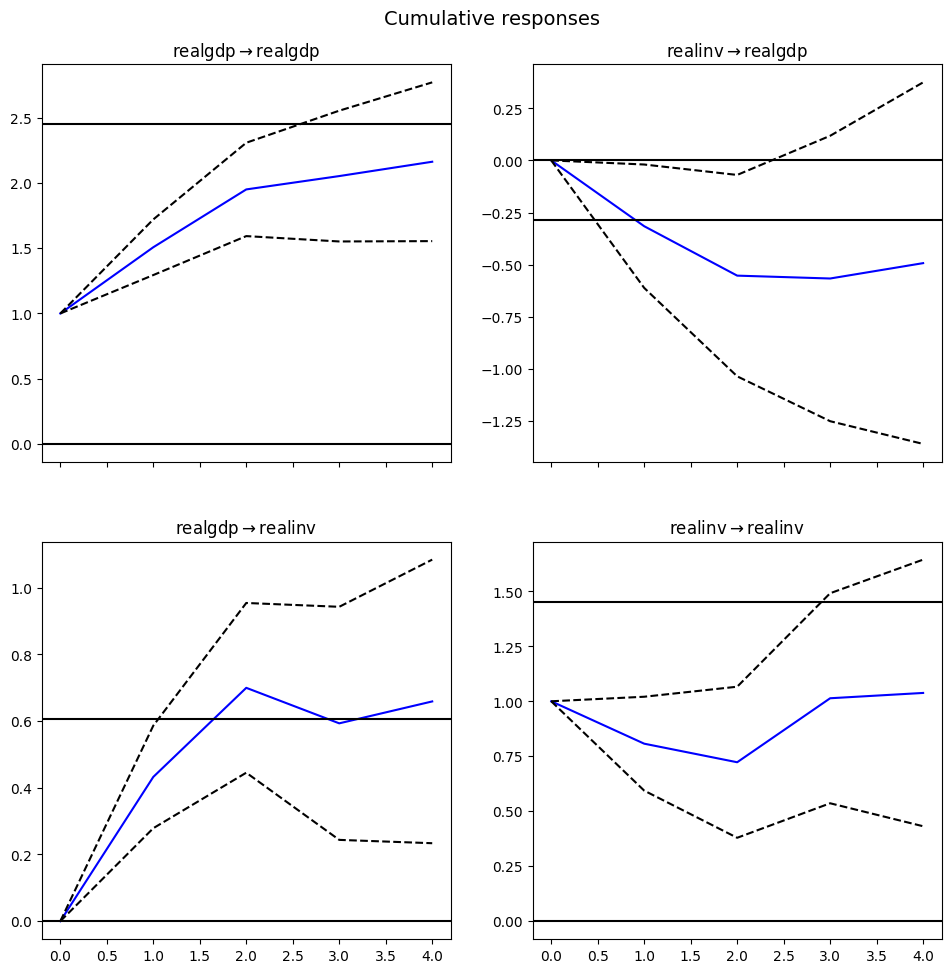

In [ ]:
irf.plot_cum_effects(orth=False)